<a href="https://colab.research.google.com/github/AchiniR/Inforgraphic-poster-DS/blob/main/Foreign_Employment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [87]:
fe = pd.read_csv('/content/drive/MyDrive/Datasets/departures_for_foreign_employment_1986_2012_0.csv',  error_bad_lines=False)

fem = pd.read_csv('/content/drive/MyDrive/Datasets/departures_for_foreign_employment_by_manpower_level_1994_2012_0.csv',  error_bad_lines=False)

net_migrants = pd.read_csv('/content/drive/MyDrive/Datasets/net-migrants.csv',  error_bad_lines=False)


<ipython-input-87-286c90d895c4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fe = pd.read_csv('/content/drive/MyDrive/Datasets/departures_for_foreign_employment_1986_2012_0.csv',  error_bad_lines=False)
<ipython-input-87-286c90d895c4>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fem = pd.read_csv('/content/drive/MyDrive/Datasets/departures_for_foreign_employment_by_manpower_level_1994_2012_0.csv',  error_bad_lines=False)
<ipython-input-87-286c90d895c4>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  net_migrants = pd.read_csv('/content/drive/MyDrive/Datasets/net-migrants.csv',  error_bad_lines=False)


# Analyze foreign_employment dataset

In [88]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          27 non-null     int64  
 1   Male No.      27 non-null     int64  
 2   Male %        27 non-null     float64
 3    Female No.   27 non-null     int64  
 4   Female %      27 non-null     float64
 5    Total        27 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.4 KB


In [89]:
# Checking for duplicate records
fe.duplicated().value_counts()

False    27
dtype: int64

No missing values or duplicated values

In [90]:
# Getting the minimum and maximum years in the dataset
min_value = min(fe['Year'])
max_value = max(fe['Year'])

print("Minimum year:", min_value)
print("Maximum year:", max_value)

Minimum year: 1986
Maximum year: 2012


This dataset contains data from 1986 to 2012

In [91]:
# fe['Year'] = pd.to_datetime(fe['Year'], format='%Y')

<Axes: >

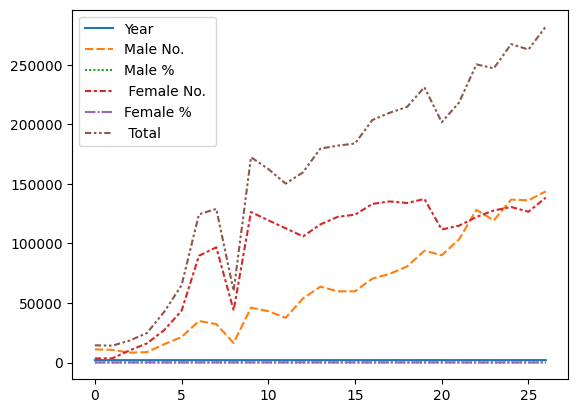

In [92]:
sns.lineplot(data=fe)

<Axes: xlabel='Year', ylabel=' Total '>

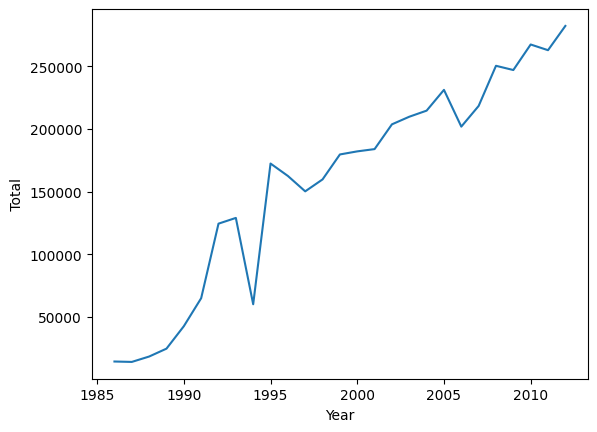

In [93]:
sns.lineplot(data=fe, x='Year', y=' Total ')

# Analyze foreign_employment_by_man_power dataset

In [94]:
fem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    19 non-null     int64  
 1   Professional Level No.  19 non-null     int64  
 2   Professional Level %    19 non-null     float64
 3   Middle Level No.        19 non-null     int64  
 4   Middle Level  %         19 non-null     float64
 5   Clerical & Related No.  19 non-null     int64  
 6   Clerical & Related  %   19 non-null     float64
 7   Skilled No.             19 non-null     int64  
 8   Skilled %               19 non-null     float64
 9   Semi Skilled No.        19 non-null     object 
 10  Semi Skilled %          19 non-null     object 
 11  Unskilled No.           19 non-null     int64  
 12  Unskilled %             19 non-null     float64
 13  Housemaid No.           19 non-null     int64  
 14  Housemaid %             19 non-null     floa

In [95]:
# Checking for duplicate records
fem.duplicated().value_counts()

False    19
dtype: int64

In [96]:
# Getting the minimum and maximum years in the dataset
min_value = min(fem['Year'])
max_value = max(fem['Year'])

print("Minimum year:", min_value)
print("Maximum year:", max_value)

Minimum year: 1994
Maximum year: 2012


This dataset contains data from 1994 to 2012

In [97]:
# fem['Year'] = pd.to_datetime(fem['Year'], format='%Y')

<Axes: >

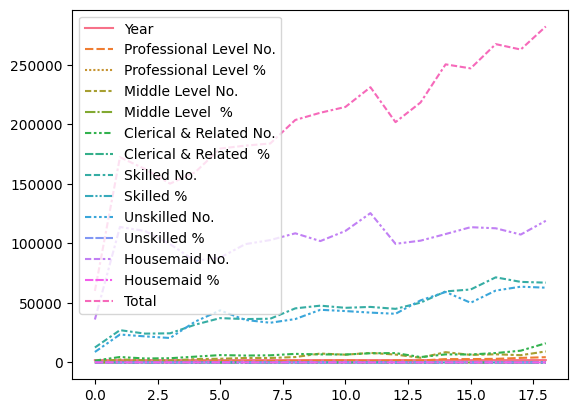

In [98]:
sns.lineplot(data=fem)

<Axes: xlabel='Year', ylabel='Total'>

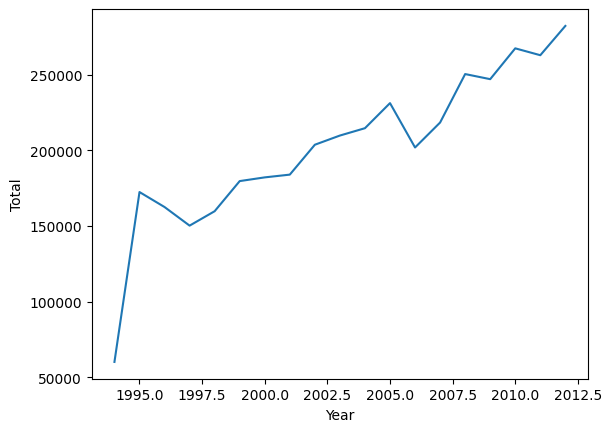

In [99]:
sns.lineplot(data=fem, x='Year', y='Total')

In [100]:
print(net_migrants.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [101]:
columns_to_drop = ['Country Name', 'Indicator Name', 'Indicator Code']  # List of column names to drop
net_migrants = net_migrants.drop(columns=columns_to_drop)

In [102]:
# Reshape the DataFrame using pd.melt()
reshaped_df = pd.melt(net_migrants, id_vars=['Country Code'], var_name='Year', value_name='Percentage')

print(reshaped_df)

      Country Code  Year  Percentage
0              ABW  1960         0.0
1              AFE  1960    -90849.0
2              AFG  1960      2606.0
3              AFW  1960      -847.0
4              AGO  1960    -43749.0
...            ...   ...         ...
16753          XKX  2022     -5000.0
16754          YEM  2022    -29998.0
16755          ZAF  2022     58496.0
16756          ZMB  2022     -5000.0
16757          ZWE  2022     -9999.0

[16758 rows x 3 columns]


In [103]:
grouped_df = reshaped_df.groupby('Country Code')

country_a_data = grouped_df.get_group('LKA')

print(country_a_data)

      Country Code  Year  Percentage
138            LKA  1960    -12606.0
404            LKA  1961    -11097.0
670            LKA  1962     -9899.0
936            LKA  1963     -9202.0
1202           LKA  1964     -8695.0
...            ...   ...         ...
15566          LKA  2018    -97100.0
15832          LKA  2019    -94897.0
16098          LKA  2020    -92400.0
16364          LKA  2021    -92400.0
16630          LKA  2022    -77495.0

[63 rows x 3 columns]


In [104]:
net_migrants_lka = country_a_data.drop(columns=['Country Code'])

In [105]:
net_migrants_lka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 138 to 16630
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        63 non-null     object 
 1   Percentage  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [106]:
net_migrants_lka["Year"] = pd.to_numeric(net_migrants_lka["Year"])

In [107]:
net_migrants_filtered = net_migrants_lka[(net_migrants_lka['Year'] < 1960) | (net_migrants_lka['Year'] > 1993)]

In [108]:
net_migrants_filtered

,Year,Percentage
9182,1994,-63104.0
9448,1995,-73695.0
9714,1996,-83689.0
9980,1997,-90691.0
10246,1998,-92990.0
10512,1999,-92896.0
10778,2000,-91900.0
11044,2001,-15604.0
11310,2002,-20309.0
11576,2003,-20932.0


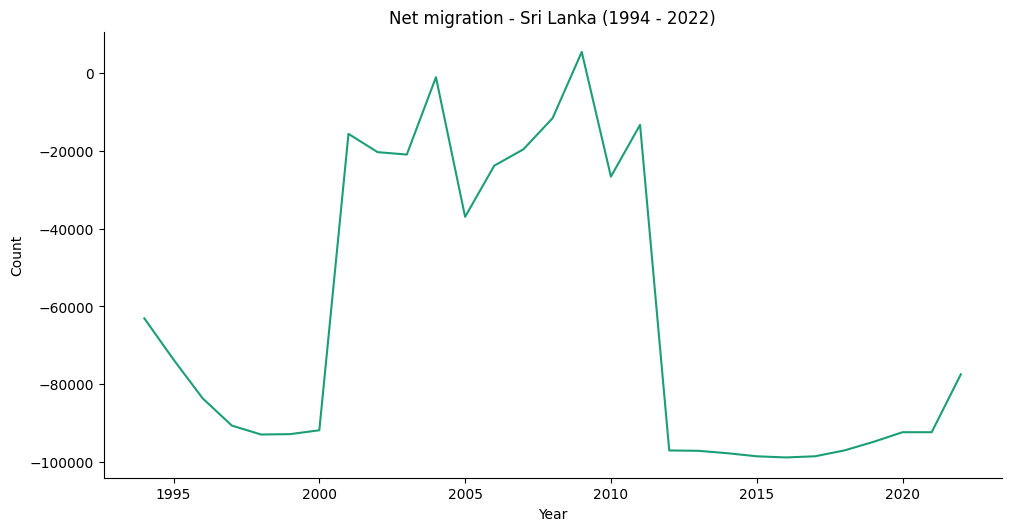

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Percentage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = net_migrants_filtered.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Net migration - Sri Lanka (1994 - 2022)')
plt.xlabel('Year')
_ = plt.ylabel('Count')

In [110]:
value_year1 = net_migrants_filtered[net_migrants_filtered['Year'] == 2019]['Percentage'].iloc[0]
value_year2 = net_migrants_filtered[net_migrants_filtered['Year'] == 2022]['Percentage'].iloc[0]

# Calculate the percentage change
if value_year1 == 0:
    percentage_change = float('inf') if value_year2 != 0 else 0
else:
    percentage_change = ((value_year2 - value_year1) / value_year1) * 100

# Print the percentage change
print(f"Percentage change from 2019 to 2022: {abs(percentage_change):.2f}%")

Percentage change from 2019 to 2022: 18.34%


In [111]:
df_test = net_migrants_filtered[(net_migrants_filtered['Year'] > 2012)]

In [112]:
df_train = net_migrants_filtered[(net_migrants_filtered['Year'] < 2013)]

In [113]:
net_migrants_lka["Year"] = pd.to_numeric(net_migrants_lka["Year"])

In [114]:
fe.columns

Index(['Year', 'Male No. ', 'Male %', ' Female No. ', 'Female %', ' Total '], dtype='object')

In [115]:
malepercentage = fe[['Male No. ', 'Year']]

In [116]:
train = pd.merge(df_train, malepercentage, how='left', on='Year')

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        19 non-null     int64  
 1   Percentage  19 non-null     float64
 2   Male No.    19 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [118]:
x = train.drop(['Male No. '],axis=1)
y = train['Male No. ']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
# linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)

In [121]:
# Evaluate the model
squared_log_errors = (np.log1p(Y_pred) - np.log1p(y_test)) ** 2
mean_squared_log_error = np.mean(squared_log_errors)
rmsle = np.sqrt(mean_squared_log_error)

print("RMSLE:", rmsle)

RMSLE: 0.2978154679747983


In [122]:
# predict male # for test set
y_pred_male_test = lr.predict(df_test)

print(y_pred_male_test)

[156062.98697143 163237.45232865 170426.01815773 177574.40171729
 184674.2079287  191676.20739887 198620.74540855 205541.32076663
 212665.41565211 218574.66930576]


In [123]:
Male_prediction =  pd.DataFrame({'Year': df_test['Year'], 'Net_migrants': df_test['Percentage'], 'Male No.': y_pred_male_test})

In [124]:
Male_prediction

,Year,Net_migrants,Male No.
14236,2013,-97189.0,156062.986971
14502,2014,-97807.0,163237.452329
14768,2015,-98598.0,170426.018158
15034,2016,-98896.0,177574.401717
15300,2017,-98598.0,184674.207929
15566,2018,-97100.0,191676.207399
15832,2019,-94897.0,198620.745409
16098,2020,-92400.0,205541.320767
16364,2021,-92400.0,212665.415652
16630,2022,-77495.0,218574.669306


<Axes: xlabel='Year', ylabel='Male No.'>

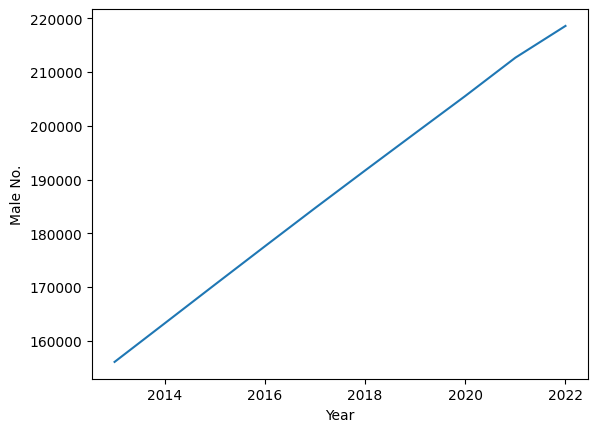

In [125]:
sns.lineplot(data=Male_prediction, x='Year', y='Male No.')

In [126]:
women = fe[[' Female No. ', 'Year']]
trainWomen = pd.merge(df_train, women, how='left', on='Year')

In [127]:
x = trainWomen.drop([' Female No. '],axis=1)
y = trainWomen[' Female No. ']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
# linear regression

lrf = LinearRegression()
lrf.fit(X_train,y_train)
Y_pred_female = lrf.predict(X_test)

# Evaluate the model
squared_log_errors = (np.log1p(Y_pred_female) - np.log1p(y_test)) ** 2
mean_squared_log_error = np.mean(squared_log_errors)
rmsle = np.sqrt(mean_squared_log_error)

print("RMSLE:", rmsle)

RMSLE: 0.4889573972128028


In [129]:
# predict female # for test set
y_pred_female_test = lrf.predict(df_test)

print(y_pred_female_test)

[128952.25683114 129702.33489467 130447.05611364 131207.04279138
 131985.48426309 132801.08303809 133638.51172878 134485.04395878
 135254.2580335  136484.99677956]


In [130]:
female_prediction =  pd.DataFrame({'Year': df_test['Year'], 'Net_migrants': df_test['Percentage'], 'Female No.': y_pred_female_test})

female_prediction

,Year,Net_migrants,Female No.
14236,2013,-97189.0,128952.256831
14502,2014,-97807.0,129702.334895
14768,2015,-98598.0,130447.056114
15034,2016,-98896.0,131207.042791
15300,2017,-98598.0,131985.484263
15566,2018,-97100.0,132801.083038
15832,2019,-94897.0,133638.511729
16098,2020,-92400.0,134485.043959
16364,2021,-92400.0,135254.258034
16630,2022,-77495.0,136484.996780


<Axes: xlabel='Year', ylabel='Female No.'>

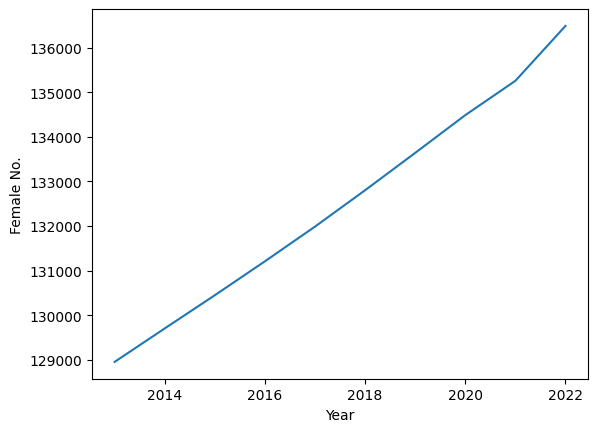

In [131]:
sns.lineplot(data=female_prediction, x='Year', y='Female No.')

In [132]:
migrants = pd.DataFrame({'Year': df_test['Year'], ' Female No. ': y_pred_female_test.astype(int), 'Male No. ': y_pred_male_test.astype(int)})

In [133]:
migrants

,Year,Female No.,Male No.
14236,2013,128952,156062
14502,2014,129702,163237
14768,2015,130447,170426
15034,2016,131207,177574
15300,2017,131985,184674
15566,2018,132801,191676
15832,2019,133638,198620
16098,2020,134485,205541
16364,2021,135254,212665
16630,2022,136484,218574


In [134]:
temp = fe[['Year', ' Female No. ', 'Male No. ']]


In [135]:
work_migrants = pd.concat([temp, migrants])

In [136]:
work_migrants2012 = work_migrants[(work_migrants['Year'] > 2011)]

In [137]:
temp = temp[(temp['Year'] > 1993)]

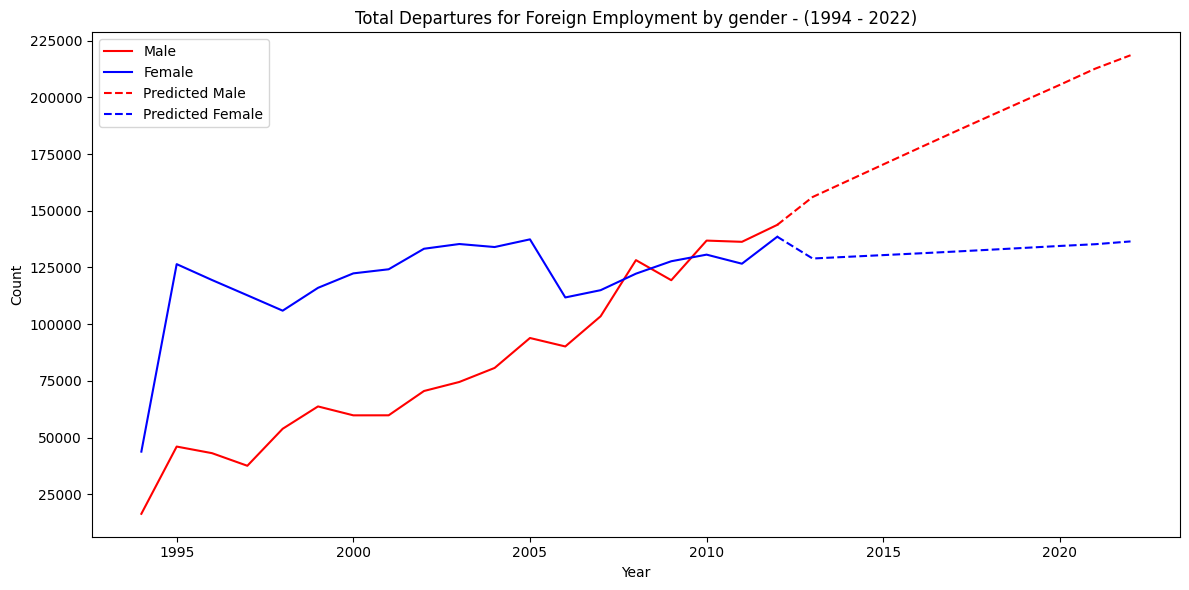

In [138]:
plt.figure(figsize=(12, 6))
# Plot the data for other years as a solid line
plt.plot(temp['Year'], temp['Male No. '], linestyle='-', label='Male', color='red')
plt.plot(temp['Year'], temp[' Female No. '], linestyle='-', label='Female', color='blue')

# Plot the data for 2013-2022 as a dotted line
plt.plot(work_migrants2012['Year'], work_migrants2012['Male No. '], linestyle='--', color='red' , label='Predicted Male')
plt.plot(work_migrants2012['Year'], work_migrants2012[' Female No. '], linestyle='--', color='blue', label='Predicted Female')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Departures for Foreign Employment by gender - (1994 - 2022)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [139]:
fem.columns

Index(['Year', 'Professional Level No.', 'Professional Level % ',
       'Middle Level No.', 'Middle Level  % ', 'Clerical & Related No.',
       'Clerical & Related  % ', 'Skilled No.', 'Skilled % ',
       'Semi Skilled No. ', 'Semi Skilled % ', 'Unskilled No.', 'Unskilled %',
       'Housemaid No.', 'Housemaid %', 'Total'],
      dtype='object')

In [140]:
manpower = fem[['Year','Professional Level No.','Middle Level No.','Clerical & Related No.', 'Skilled No.','Unskilled No.','Housemaid No.' ]]

In [141]:
# Reshape the data to long format
df_manpower = manpower.melt(id_vars='Year', var_name='Manpower Level', value_name='Value')

In [142]:
df_manpower['Manpower Level'] = df_manpower['Manpower Level'].str.replace(' Level No.', '')
df_manpower['Manpower Level'] = df_manpower['Manpower Level'].str.replace(' No.', '')

<ipython-input-142-72e0ce231962>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_manpower['Manpower Level'] = df_manpower['Manpower Level'].str.replace(' Level No.', '')
<ipython-input-142-72e0ce231962>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_manpower['Manpower Level'] = df_manpower['Manpower Level'].str.replace(' No.', '')


## Predict Manpower count for 2012-2022


In [143]:
# df_manpower['Year'] = pd.to_datetime(df_manpower['Year'], format='%Y')

In [144]:
train = df_manpower

In [145]:
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Professional Level No.': [0,0,0,0,0,0,0,0,0,0],
    'Middle Level No.': [0,0,0,0,0,0,0,0,0,0],
    'Clerical & Related No.': [0,0,0,0,0,0,0,0,0,0],
    'Skilled No.': [0,0,0,0,0,0,0,0,0,0],
    'Unskilled No.': [0,0,0,0,0,0,0,0,0,0],
    'Housemaid No.': [0,0,0,0,0,0,0,0,0,0],
}

df1 = pd.DataFrame(data)

# Reshape the data to long format
df_manpower_test = df1.melt(id_vars='Year', var_name='Manpower Level', value_name='Value')

In [146]:
df_manpower_test = pd.merge(df_manpower_test, migrants,how='left', on='Year')

In [147]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Manpower' column
df_manpower_test["Manpower Level"] = label_encoder.fit_transform(df_manpower_test["Manpower Level"])

In [148]:
df_manpower_test.drop('Value',axis=1,inplace=True)

In [149]:
df2 = fe[[' Female No. ', 'Year', 'Male No. ']]
df_manpower_train = pd.merge(df_manpower, df2, how='left', on='Year')

In [150]:
# Fit and transform the 'Manpower' column
df_manpower_train["Manpower Level"] = label_encoder.fit_transform(df_manpower_train["Manpower Level"])

In [151]:
df_manpower_train

,Year,Manpower Level,Value,Female No.,Male No.
0,1994,3,262,43791,16377
1,1995,3,878,126468,46021
2,1996,3,599,119464,43112
3,1997,3,573,112731,37552
4,1998,3,695,105949,53867
...,...,...,...,...,...
109,2008,1,107923,122267,128232
110,2009,1,113678,127745,119381
111,2010,1,112752,130657,136850
112,2011,1,107491,126654,136307


In [152]:
x = df_manpower_train.drop(['Value'],axis=1)
y = df_manpower_train['Value']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
# linear regression

lrm = LinearRegression()
lrm.fit(X_train,y_train)
Y_pred_manpower = lrm.predict(X_test)

# Evaluate the model
squared_log_errors = (np.log1p(Y_pred_manpower) - np.log1p(y_test)) ** 2
mean_squared_log_error = np.mean(squared_log_errors)
rmsle = np.sqrt(mean_squared_log_error)

print("RMSLE:", rmsle)

RMSLE: 1.9444469537237012


In [154]:
# predict manpower # for test set
y_pred_manpower_test = lrm.predict(df_manpower_test)

print(y_pred_manpower_test)

[48042.16203681 49420.36404425 50799.30987294 52176.13953224
 53550.56814151 54920.31218189 56287.02440852 57652.82546443
 59028.45459871 60344.24272618 48521.10158488 49899.30359232
 51278.24942101 52655.07908031 54029.50768958 55399.25172996
 56765.96395658 58131.76501249 59507.39414678 60823.18227425
 49478.98068102 50857.18268846 52236.12851715 53612.95817645
 54987.38678572 56357.1308261  57723.84305272 59089.64410863
 60465.27324292 61781.06137039 47563.22248874 48941.42449618
 50320.37032487 51697.19998418 53071.62859344 54441.37263382
 55808.08486045 57173.88591636 58549.51505064 59865.30317811
 47084.28294067 48462.48494811 49841.4307768  51218.26043611
 52592.68904538 53962.43308575 55329.14531238 56694.94636829
 58070.57550257 59386.36363004 49000.04113295 50378.24314039
 51757.18896908 53134.01862838 54508.44723765 55878.19127803
 57244.90350465 58610.70456056 59986.33369485 61302.12182232]


In [155]:
predicted_manpower = pd.DataFrame({'Year': df_manpower_test['Year'], 'Manpower Level': df_manpower_test['Manpower Level'], 'Value': y_pred_manpower_test.astype(int)})

In [156]:
# inverse transform the 'Manpower' column
predicted_manpower["Manpower Level"] = label_encoder.inverse_transform(predicted_manpower['Manpower Level'])

In [157]:
records_2012 = df_manpower[df_manpower['Year'] == 2012]

# Print the records for the year 2013
print(records_2012)

     Year      Manpower Level   Value
18   2012        Professional    4445
37   2012              Middle    9278
56   2012  Clerical & Related   16166
75   2012             Skilled   67078
94   2012           Unskilled   62847
113  2012           Housemaid  119052


In [158]:
predicted_manpower = pd.concat([predicted_manpower,records_2012 ])

In [159]:
predicted_manpower = predicted_manpower.sort_values(by='Year')

In [160]:
predicted_manpower

,Year,Manpower Level,Value
113,2012,Housemaid,119052
75,2012,Skilled,67078
56,2012,Clerical & Related,16166
37,2012,Middle,9278
18,2012,Professional,4445
...,...,...,...
59,2022,Housemaid,61302
49,2022,Unskilled,59386
9,2022,Professional,60344
19,2022,Middle,60823


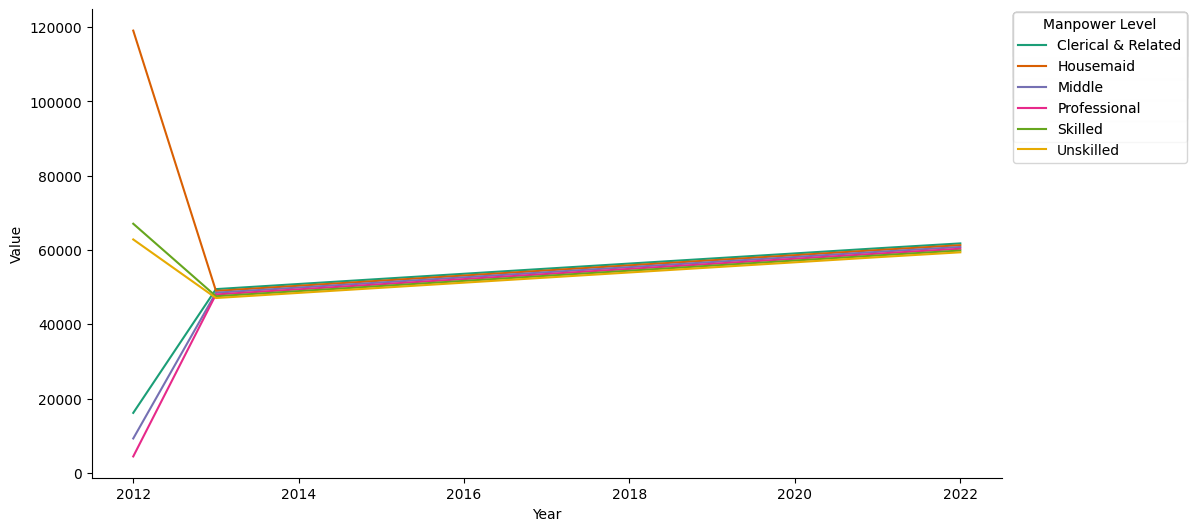

In [161]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = predicted_manpower.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Manpower Level')):
  _plot_series(series, series_name, i)
  fig.legend(title='Manpower Level', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Value')

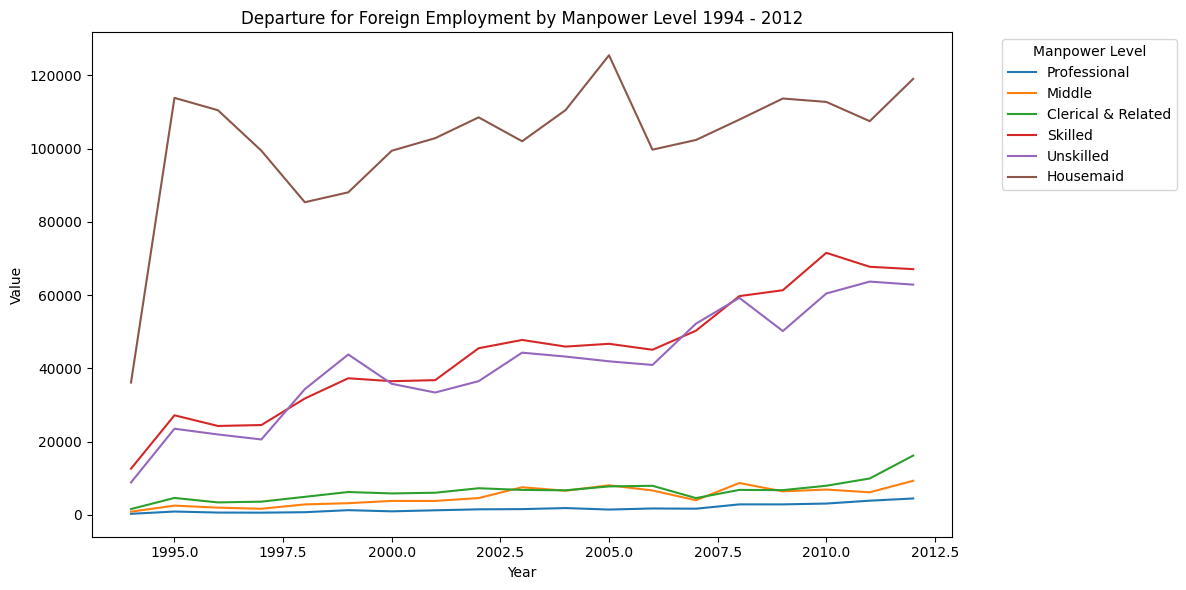

In [162]:
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_manpower, x='Year', y='Value', hue='Manpower Level')
plt.title('Departure for Foreign Employment by Manpower Level 1994 - 2012')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Manpower Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [163]:

# Pivot the 'Manpower Level' column into separate columns
pivoted_df = df_manpower.pivot_table(index='Year', columns='Manpower Level', values='Value', aggfunc='sum')

# Reset the index to make 'Year' a regular column
# pivoted_df.reset_index(inplace=True)
# pivoted_df.drop('Manpower Level',axis=1,inplace=True)

# Print the pivoted DataFrame
print(pivoted_df)

Manpower Level  Clerical & Related  Housemaid  Middle  Professional  Skilled  \
Year                                                                           
1994                          1559      36104     833           262    12586   
1995                          4594     113860    2495           878    27165   
1996                          3371     110479    1944           599    24254   
1997                          3579      99429    1635           573    24502   
1998                          4896      85349    2823           695    31749   
1999                          6210      88063    3161          1253    37277   
2000                          5825      99413    3781           935    36475   
2001                          6015     102850    3776          1218    36763   
2002                          7239     108535    4555          1481    45478   
2003                          6779     102011    7507          1541    47744   
2004                          6679     1

In [164]:
pivoted_df.columns

Index(['Clerical & Related', 'Housemaid', 'Middle', 'Professional', 'Skilled',
       'Unskilled'],
      dtype='object', name='Manpower Level')

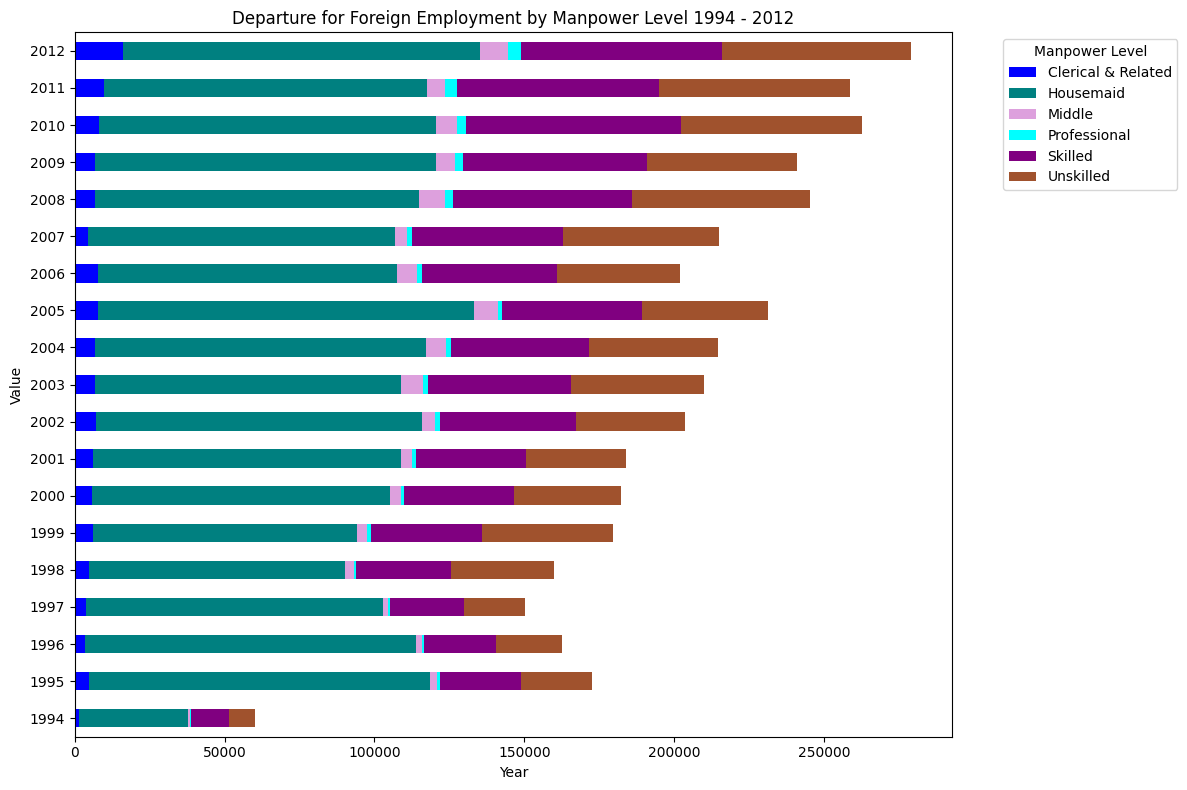

In [173]:
# Create a figure and set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the DataFrame
pivoted_df.plot(kind='barh', stacked=True, ax=ax, color=['blue', 'teal', 'plum', 'aqua', 'purple', 'sienna'])

# Add title and labels
plt.title('Departure for Foreign Employment by Manpower Level 1994 - 2012')
plt.xlabel('Year')
plt.ylabel('Value')

# Adjust the legend position
plt.legend(title='Manpower Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Calculate the total for each bar
# totals = pivoted_df.sum(axis=0)

# # Get the positions of the last bars (assuming data is stacked)
# last_bar_positions = [bar.get_x() + bar.get_width() for bar in ax.containers[-1]]

# # Iterate through totals and positions, adding text annotations
# for position, total in zip(last_bar_positions, totals):
#     plt.text(position + 0.1, ax.get_ylim()[1] * 0.05, f"Total: {total:.2f}", ha='left', va='bottom')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()

In [177]:
total = (4445+9278+16166+67078)/282331
print(total*100)

34.34514807088134


In [179]:
4445+9278+16166+67078

96967

In [178]:
total = (3844+6134+9906+67726)/282331
print(total*100)

31.030953030308396
